Latin Hypercube Implementation


In [98]:
! pip install -r requirements.txt

In [99]:
import math
import torch
from matplotlib import pyplot as plt
import time

from data import Dataprep, load_data
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd

In [100]:
import numpy as np
import pandas as pd
import plotly.express as px
from scipy.stats import qmc
from os import path

In [101]:
dataset_type='Caselist'
sensor='foundation_origin xy FloaterOffset [m]'
samples_per_step=0
validation_size=0.1
initial_sample_size=100

In [102]:
data = Dataprep(dataset_type, sensor, initial_samplesize=samples_per_step, scaling='Minmax', sampling_method='LHC')
known_data, pool_data = data.data_known, data.data_pool

In [103]:
# HYPERPARAMETERS STRENGTH OR OPTIMIZATION

#sampler = qmc.LatinHypercube(d=2, strength=2)
#sample = sampler.random(n=9)
#qmc.discrepancy(sample)

#sampler = qmc.LatinHypercube(d=2, optimization="random-cd")
#sample = sampler.random(n=5)
#qmc.discrepancy(sample)

In [104]:
pool_data.shape

(1890, 11)

In [105]:
# get the minmax values for every column and store themalso in a lower and upper bound list
minmax_values = [[np.min(pool_data[:, i]), np.max(pool_data[:, i])] for i in range(pool_data.shape[1] - 1)]

minmax_values = np.array(minmax_values)

lower_bounds = minmax_values[:, 0]
upper_bounds = minmax_values[:, 1]

In [106]:
sampler = qmc.LatinHypercube(d=len(minmax_values), optimization="random-cd", seed=42)
samples = sampler.random(initial_sample_size)
lower_bounds = minmax_values[:, 0]
upper_bounds = minmax_values[:, 1]
samples = qmc.scale(samples, lower_bounds, upper_bounds)



In [107]:
samples

array([[3.07354602e-01, 5.34440306e-01, 3.14140208e-02, 1.68069585e-01,
        4.90582265e-02, 6.06369543e-03, 5.77079407e-01, 2.49344696e-01,
        4.29427681e-01, 2.11445085e-01],
       [4.10752983e-01, 9.40732350e-01, 8.38883996e-01, 7.75467201e-01,
        2.32125678e-01, 8.32662465e-01, 4.18750763e-01, 3.64954690e-01,
        8.78371285e-01, 2.72703143e-01],
       [8.39030221e-01, 2.76454740e-01, 1.10293020e-01, 1.10687888e-02,
        1.39513015e-01, 4.41189639e-01, 4.86817778e-02, 5.35176966e-01,
        2.79155068e-01, 6.53169510e-01],
       [8.93123350e-01, 8.53501534e-01, 2.18536156e-02, 4.23351491e-01,
        3.75304442e-01, 7.88105286e-01, 3.57929795e-01, 9.28270561e-01,
        2.22627932e-02, 5.45920580e-01],
       [9.05628481e-01, 5.71673218e-01, 2.19526260e-01, 6.89987669e-01,
        6.43192855e-01, 8.27727613e-01, 1.56125216e-01, 1.06808675e-01,
        1.63175045e-01, 2.04829805e-01],
       [1.58000918e-01, 2.23458976e-01, 2.54098046e-01, 4.16295403e-01,
   

In [108]:
len(samples)

100

In [109]:
samples.shape

(100, 10)

In [110]:
import numpy as np

matching_indices = []
for selected_value in samples:
    # Calculate the Euclidean distance between the selected value and each row in pool_data
    distances = np.linalg.norm(pool_data[:, :-1] - selected_value, axis=1)
    print(distances)
    # Find the index of the row with the highest similarity
    max_similarity_index = np.argmin(distances)
    index_count = 0

    # Check if the point is already in the matching_indices array
    while max_similarity_index in matching_indices:
        # Find the index of the second nearest point
        max_similarity_index = np.argsort(distances)[index_count]
        index_count += 1
        
        
    matching_indices.append(max_similarity_index)
        
matching_indices = np.array(matching_indices)


[1.75169777 1.76404448 1.78651842 ... 1.74333389 1.75573942 1.77831832]
[1.22615462 1.19885725 1.18635975 ... 1.1458633  1.11660479 1.10317588]
[1.93687132 1.96582666 2.00346343 ... 1.98384499 2.01212447 2.04891097]
[1.82855568 1.81685207 1.81512375 ... 1.87493061 1.86351828 1.86183328]
[1.58161333 1.59212574 1.61388206 ... 1.47782594 1.48907124 1.51231083]
[1.64141545 1.67974556 1.72778267 ... 1.6688751  1.70658857 1.75389063]
[1.38979919 1.44843416 1.51682847 ... 1.37384207 1.43313004 1.5022213 ]
[1.06193343 1.06823227 1.09129512 ... 0.97703687 0.98387938 1.00887238]
[1.30043328 1.29933468 1.31217443 ... 1.32510989 1.32403177 1.33663431]
[1.06385817 1.11747346 1.18409756 ... 1.04955577 1.10386596 1.17126433]
[1.50798106 1.56033882 1.62224998 ... 1.50126028 1.55384452 1.6160045 ]
[1.64755103 1.69396687 1.74957438 ... 1.64931498 1.69568254 1.75123558]
[1.63596789 1.62143632 1.61805679 ... 1.51592121 1.50022729 1.49657407]
[1.35661265 1.39712805 1.44911113 ... 1.49440156 1.5312756  1.57

In [111]:
len(np.unique(matching_indices))

100

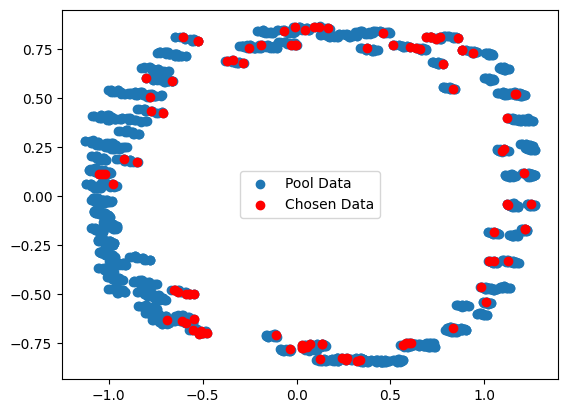

In [112]:
#import pca
from sklearn.decomposition import PCA


# Generate PCA
pca = PCA(n_components=2)
pool_data_pca = pca.fit_transform(pool_data)

# Plot pool data with two PC
plt.scatter(pool_data_pca[:, 0], pool_data_pca[:, 1], label='Pool Data')

# Plot data with corresponding indices
plt.scatter(pool_data_pca[matching_indices, 0], pool_data_pca[matching_indices, 1], label='Chosen Data', c='red')

# Add legend
plt.legend()

# Show the plot
plt.show()





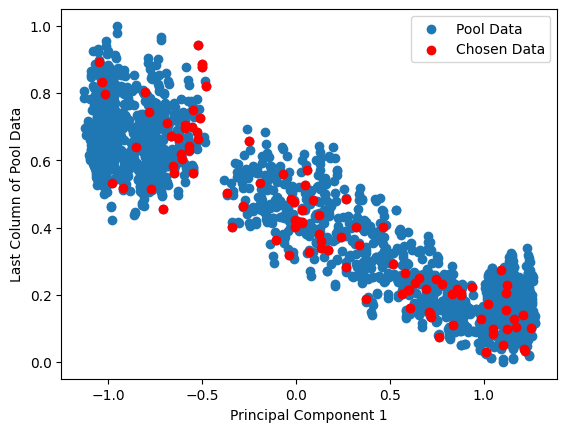

In [113]:
# Plot pool data with the first PC on the x-axis and the last column of pool data as y
plt.scatter(pool_data_pca[:, 0], pool_data[:, -1], label='Pool Data')

# Plot data with corresponding indices
plt.scatter(pool_data_pca[matching_indices, 0], pool_data[matching_indices, -1], label='Chosen Data', c='red')

# Add legend
plt.legend()

# Set x-axis label
plt.xlabel('Principal Component 1')

# Set y-axis label
plt.ylabel('Last Column of Pool Data')

# Show the plot
plt.show()


In [114]:
# Get discrepancy of the selected points mapped to the original space
selected_points = pool_data[matching_indices, :-1]

# Calculate the discrepancy
qmc.discrepancy(selected_points)



0.9727880677551148

In [115]:
# sample 33 random points from the pool data and get the discrepancy
random_indices = np.random.choice(pool_data[:,:-1].shape[0], initial_sample_size, replace=False)

# Get discrepancy of the selected points mapped to the original space
random_points = pool_data[random_indices, :-1]

# Calculate the discrepancy
qmc.discrepancy(random_points)

1.5656177269809959

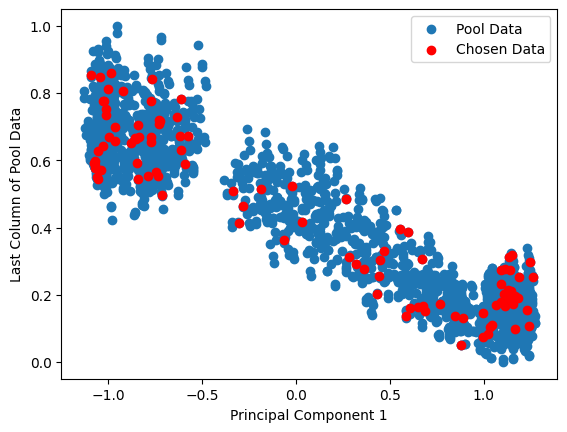

In [116]:
# Plot pool data with the first PC on the x-axis and the last column of pool data as y
plt.scatter(pool_data_pca[:, 0], pool_data[:, -1], label='Pool Data')

# Plot data with corresponding indices
plt.scatter(pool_data_pca[random_indices, 0], pool_data[random_indices, -1], label='Chosen Data', c='red')

# Add legend
plt.legend()

# Set x-axis label
plt.xlabel('Principal Component 1')

# Set y-axis label
plt.ylabel('Last Column of Pool Data')

# Show the plot
plt.show()
